# ANLY 590 Assignment 1

## yz721 Yunxi Zhang

## 1.
ANLY-590 Assignment 1
August 2020
Regularization. Using the accompanying Hitters dataset, we will explore regression models to predict a player’s Salary from other variables. You must python.
https://gist.github.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad

In [115]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [116]:
df = pd.read_csv('Hitters.csv').dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  263 non-null    object 
 1   AtBat       263 non-null    int64  
 2   Hits        263 non-null    int64  
 3   HmRun       263 non-null    int64  
 4   Runs        263 non-null    int64  
 5   RBI         263 non-null    int64  
 6   Walks       263 non-null    int64  
 7   Years       263 non-null    int64  
 8   CAtBat      263 non-null    int64  
 9   CHits       263 non-null    int64  
 10  CHmRun      263 non-null    int64  
 11  CRuns       263 non-null    int64  
 12  CRBI        263 non-null    int64  
 13  CWalks      263 non-null    int64  
 14  League      263 non-null    object 
 15  Division    263 non-null    object 
 16  PutOuts     263 non-null    int64  
 17  Assists     263 non-null    int64  
 18  Errors      263 non-null    int64  
 19  Salary      263 non-null    f

In [117]:
df

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,-Willie McGee,497,127,7,65,48,37,5,2703,806,...,379,311,138,N,E,325,9,3,700.0,N
318,-Willie Randolph,492,136,5,76,50,94,12,5511,1511,...,897,451,875,A,E,313,381,20,875.0,A
319,-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,...,217,93,146,A,W,37,113,7,385.0,A
320,-Willie Upshaw,573,144,9,85,60,78,8,3198,857,...,470,420,332,A,E,1314,131,12,960.0,A


In [118]:
y = df.Salary

# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1)

In [119]:
X

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,-Willie McGee,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3
318,-Willie Randolph,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20
319,-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7
320,-Willie Upshaw,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12


In [120]:
y

1       475.0
2       480.0
3       500.0
4        91.5
5       750.0
        ...  
317     700.0
318     875.0
319     385.0
320     960.0
321    1000.0
Name: Salary, Length: 263, dtype: float64

In [121]:
X = X.drop(['Unnamed: 0'], axis = 1)

In [122]:
X

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12


### 1.1
Use LASSO regression to predict Salary from the other numeric predictors. Create a visualization of the coefficient trajectories. Comment on which are the final three predictors that remain in the model. Use cross-validation to find the optimal value of the regularization penality. How many predictors are left in that model?

In [123]:
alphas = 10**np.linspace(10,-2,100)*0.5
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)

Text(0.5, 1.0, 'Coefficients Trajectory')

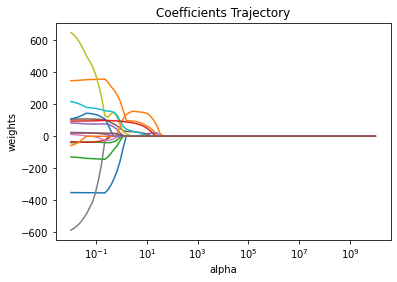

In [124]:
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Coefficients Trajectory')

In [125]:
lasso = Lasso(alpha=9, max_iter=10000, normalize=True)
lasso.fit(X, y)
pd.Series(lasso.coef_, index=X.columns)

AtBat      0.000000
Hits       0.542109
HmRun      0.000000
Runs       0.000000
RBI        0.000000
Walks      0.306345
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.000000
CRuns      0.085858
CRBI       0.232542
CWalks     0.000000
PutOuts    0.000000
Assists    0.000000
Errors     0.000000
dtype: float64

In [126]:
lasso = Lasso(alpha=10, max_iter=10000, normalize=True)
lasso.fit(X, y)
pd.Series(lasso.coef_, index=X.columns)

AtBat      0.000000
Hits       0.329475
HmRun      0.000000
Runs       0.000000
RBI        0.000000
Walks      0.000000
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.000000
CRuns      0.076322
CRBI       0.204475
CWalks     0.000000
PutOuts    0.000000
Assists    0.000000
Errors     0.000000
dtype: float64

In [127]:
lasso = Lasso(alpha=11, max_iter=10000, normalize=True)
lasso.fit(X, y)
pd.Series(lasso.coef_, index=X.columns)

AtBat      0.000000
Hits       0.037439
HmRun      0.000000
Runs       0.000000
RBI        0.000000
Walks      0.000000
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.000000
CRuns      0.062909
CRBI       0.176160
CWalks     0.000000
PutOuts    0.000000
Assists    0.000000
Errors     0.000000
dtype: float64

In [128]:
lasso = Lasso(alpha=12, max_iter=10000, normalize=True)
lasso.fit(X, y)
pd.Series(lasso.coef_, index=X.columns)

AtBat      0.000000
Hits       0.000000
HmRun      0.000000
Runs       0.000000
RBI        0.000000
Walks      0.000000
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.000000
CRuns      0.039196
CRBI       0.150027
CWalks     0.000000
PutOuts    0.000000
Assists    0.000000
Errors     0.000000
dtype: float64

In [129]:
print("When aplha is 10 or 11, the final three predictors which remain in the model are 'Hits', 'CRuns'.'CRBI'")

When aplha is 10 or 11, the final three predictors which remain in the model are 'Hits', 'CRuns'.'CRBI'


In [132]:
lassocv = LassoCV(alphas =None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)
print('The optimal value of the regularization penalty is',lassocv.alpha_)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))



The optimal value of the regularization penalty is 0.15312251826359774


139377.51075010363

In [133]:
pd.Series(lasso.coef_, index=X.columns)
print('')
print('There are 14 predictors are left in the model')


There are 14 predictors are left in the model


### 1.2
Repeat with Ridge Regression. Visualize coeffecient trajectories. Use cross- validation to find the optimal vaule of the regularization penalty.

Text(0.5, 1.0, 'Coefficients Trajectory')

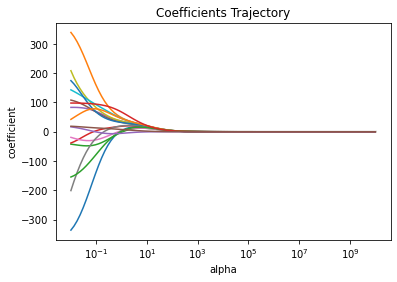

In [93]:
ridge = Ridge(normalize = True)
ridge_coefs = []

alphas = 10**np.linspace(10,-2,100)*0.5

for j in alphas:
    ridge.set_params(alpha=j)
    ridge.fit(scale(X_train), y_train)
    ridge_coefs.append(ridge.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, ridge_coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('coefficient')
plt.title('Coefficients Trajectory')

In [94]:
ridgecv = RidgeCV(alphas = alphas, scoring='neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridge.set_params(alpha=ridgecv.alpha_)
print('The optimal value of the regularization penalty is',ridgecv.alpha_)

The optimal value of the regularization penalty is 0.01155064850041579


## 2
Short Answer. Explain in your own words the bias-variance tradeoff. What role does regularization play in this tradeoff? Make reference to your findings in number (1) to describe models of high/low bias and variance.|

（1）Bias and variance are used to measure the quality and accuracy of the model. We expect the results of the model to have both low variance and low bias. But this is only an ideal result. The real situation is that while reducing the variance, it usually increases the bias. At the same time, keeping the two at a relatively low level is what we are after, enhancing a certain degree of flexibility, do not make it over-fitting, and do not make it under-fitting.

 (2) The purpose of regularization is to prevent overfitting, increase the bias, and get a lower variance model, thereby getting a more suitable MSE.

 (3) The greater the penalty in the Lasso and Ridge regression models, the greater the bias, and the smaller the variance. When the penalty value is equal to 0.15312251826359774 and 0.01155064850041579 in the two questions, we can get a small value of alpha. When the alpha becomes extremely large, the coefficient of the predictor variable will tend to 0, and when the alpha tends to 0, the penalty will also tend to 0, resulting in LSE.